In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
standings_df = pd.read_csv('constructor_standings.csv')
constructors_df = pd.read_csv('constructors.csv')
races_df = pd.read_csv('races.csv')
circuits_df = pd.read_csv('circuits.csv')

QUESTION - 7

In [ ]:
analysis_df = standings_df.merge(constructors_df, on='constructorId') \
                         .merge(races_df[['raceId', 'year']], on='raceId')

teams = constructors_df['name'].unique()
print("Available teams:", teams)


Available Teams: ['mclaren' 'bmw sauber' 'williams' 'renault' 'toro rosso' 'ferrari'
 'toyota' 'super aguri' 'red bull' 'force india' 'honda' 'spyker' 'mf1'
 'spyker mf1' 'sauber' 'bar' 'jordan' 'minardi' 'jaguar' 'prost' 'arrows'
 'benetton' 'brawn' 'stewart' 'tyrrell' 'lola' 'ligier' 'forti' 'footwork'
 'pacific' 'simtek' 'team lotus' 'larrousse' 'brabham' 'dallara'
 'fondmetal' 'march' 'andrea moda' 'ags' 'lambo' 'leyton house' 'coloni'
 'euro brun' 'osella' 'onyx' 'life' 'rial' 'zakspeed' 'ram' 'alfa romeo'
 'spirit' 'toleman' 'ats' 'theodore' 'fittipaldi' 'ensign' 'shadow' 'wolf'
 'merzario' 'kauhsen' 'rebaque' 'surtees' 'hesketh' 'martini' 'brm'
 'penske' 'lec' 'mcguire' 'boro' 'apollon' 'kojima' 'parnelli' 'maki'
 'embassy hill' 'lyncar' 'trojan' 'amon' 'token' 'iso marlboro' 'tecno'
 'matra' 'politoys' 'connew' 'bellasi' 'de tomaso' 'cooper' 'eagle' 'lds'
 'protos' 'shannon' 'scirocco' 're' 'brp' 'porsche' 'derrington' 'gilby'
 'stebro' 'emeryson' 'enb' 'jbw' 'ferguson' 'mbm' '

In [19]:
def compare_teams(team1_name, team2_name, df):
    team_data = df[df['name'].isin([team1_name, team2_name])]
    race_comparisons = team_data.groupby('raceId').agg({
        'name': list,
        'position': list,
        'points': list,
        'year': 'first'
    })

    team1_wins = sum(1 for _, row in race_comparisons.iterrows() if len(row['name']) == 2 and row['position'][row['name'].index(team1_name)] < row['position'][row['name'].index(team2_name)])
    team2_wins = sum(1 for _, row in race_comparisons.iterrows() if len(row['name']) == 2 and row['position'][row['name'].index(team2_name)] < row['position'][row['name'].index(team1_name)])

    total_races = team1_wins + team2_wins

    print(f"\nHead-to-head comparison: {team1_name} vs {team2_name}")
    print(f"Total races compared: {total_races}")
    print(f"{team1_name} wins: {team1_wins} ({team1_wins/total_races*100:.1f}%)")
    print(f"{team2_name} wins: {team2_wins} ({team2_wins/total_races*100:.1f}%)")

    # Visualization
    plt.bar([team1_name, team2_name], [team1_wins, team2_wins], color=['red', 'blue'])
    plt.xlabel("Teams")
    plt.ylabel("Number of Wins")
    plt.title(f"Head-to-Head Comparison: {team1_name} vs {team2_name}")
    plt.show()



Head-to-head comparison: ferrari vs mclaren
Total races compared: 927
ferrari wins: 551 (59.4%)
mclaren wins: 376 (40.6%)


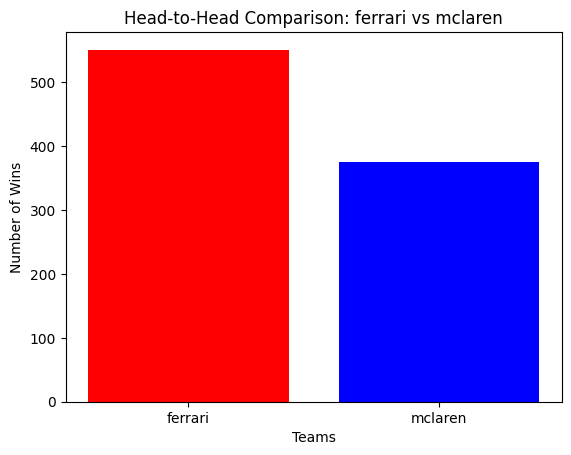


Head-to-head comparison: red bull vs mercedes
Total races compared: 305
red bull wins: 146 (47.9%)
mercedes wins: 159 (52.1%)


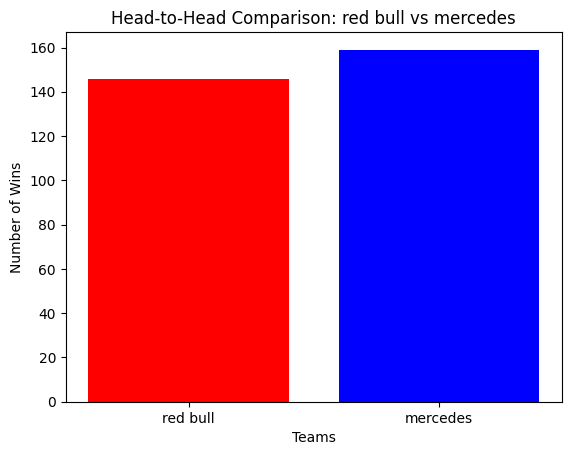

In [20]:
compare_teams('ferrari', 'mclaren', analysis_df)
compare_teams('red bull', 'mercedes', analysis_df)


Recent performance (2015 onwards):

Head-to-head comparison: ferrari vs mercedes
Total races compared: 209
ferrari wins: 54 (25.8%)
mercedes wins: 155 (74.2%)


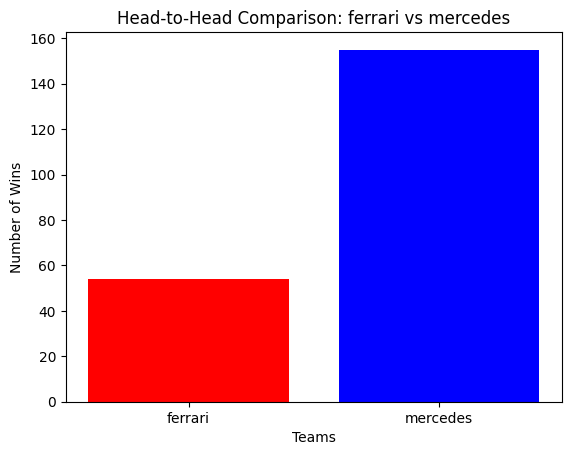

In [21]:
recent_df = analysis_df[analysis_df['year'] >= 2015]
print("\nRecent performance (2015 onwards):")
compare_teams('ferrari', 'mercedes', recent_df)


In [24]:
standings_df.head()

,constructorStandingsId,raceId,constructorId,points,position,wins
0,1,18,1,14.0,1,1
1,2,18,2,8.0,3,0
2,3,18,3,9.0,2,0
3,4,18,4,5.0,4,0
4,5,18,5,2.0,5,0


In [29]:
team1 = 'ferrari'
team2 = 'mclaren'
team_data = analysis_df[analysis_df['name'].isin([team1, team2])]
print(team_data.groupby(['raceId', 'name'])['position'].count())


raceId  name   
1       ferrari    1
2       ferrari    1
        mclaren    1
3       ferrari    1
        mclaren    1
                  ..
1142    mclaren    1
1143    ferrari    1
        mclaren    1
1144    ferrari    1
        mclaren    1
Name: position, Length: 1987, dtype: int64


In [38]:
def compare_teams_with_circuits_debug(team1, team2, df):
    """Compare race performance between two teams per circuit."""
    team_data = df[df['name'].isin([team1, team2])]
    circuit_results = team_data.groupby(['circuitId', 'name_circuit', 'raceId']).agg({
        'name': list,
        'position': list
    }).reset_index()

    circuit_wins = {}

    print(f"\nCircuit-wise Breakdown for {team1} vs {team2}:")
    for _, row in circuit_results.iterrows():
        if len(row['name']) == 2 and team1 in row['name'] and team2 in row['name']:
            pos1 = row['position'][row['name'].index(team1)]
            pos2 = row['position'][row['name'].index(team2)]
            circuit = row['name_circuit']

            if pos1 < pos2:
                circuit_wins.setdefault(circuit, {team1: 0, team2: 0})
                circuit_wins[circuit][team1] += 1
            elif pos2 < pos1:
                circuit_wins.setdefault(circuit, {team1: 0, team2: 0})
                circuit_wins[circuit][team2] += 1

    for circuit, results in circuit_wins.items():
        print(f"{circuit}: {team1} {results.get(team1, 0)} - {team2} {results.get(team2, 0)}")

    return circuit_wins

# Run and analyze results
circuit_results = compare_teams_with_circuits_debug('ferrari', 'mclaren', data)



Circuit-wise Breakdown for ferrari vs mclaren:
albert park grand prix circuit: ferrari 16 - mclaren 8
sepang international circuit: ferrari 13 - mclaren 6
bahrain international circuit: ferrari 13 - mclaren 8
circuit de barcelona-catalunya: ferrari 22 - mclaren 12
istanbul park: ferrari 4 - mclaren 5
circuit de monaco: ferrari 32 - mclaren 21
circuit gilles villeneuve: ferrari 28 - mclaren 15
circuit de nevers magny-cours: ferrari 13 - mclaren 5
silverstone circuit: ferrari 33 - mclaren 14
hockenheimring: ferrari 22 - mclaren 14
hungaroring: ferrari 23 - mclaren 16
valencia street circuit: ferrari 2 - mclaren 3
circuit de spa-francorchamps: ferrari 20 - mclaren 19
autodromo nazionale di monza: ferrari 31 - mclaren 23
marina bay street circuit: ferrari 10 - mclaren 5
fuji speedway: ferrari 4 - mclaren 0
shanghai international circuit: ferrari 12 - mclaren 5
autódromo josé carlos pace: ferrari 23 - mclaren 17
indianapolis motor speedway: ferrari 7 - mclaren 1
nürburgring: ferrari 19 - m

In [39]:
# Sum circuit-wise wins
ferrari_total_wins = sum(circuit_results[circuit]['ferrari'] for circuit in circuit_results)
mclaren_total_wins = sum(circuit_results[circuit]['mclaren'] for circuit in circuit_results)

# Compare with overall function output
print(f"Total circuit-wise wins: Ferrari {ferrari_total_wins} - McLaren {mclaren_total_wins}")


Total circuit-wise wins: Ferrari 551 - McLaren 376


Here, the circuit factor does not affect the team performance , since the total circuit wins with circuit factor is same as without circuit factor.  The circuit-wise factor is only a categorization and does not alter the calculations. 

In [50]:
standings1_df = pd.read_csv('constructor_standings.csv')
analysis_df = (
    standings1_df
    .merge(teams, on='constructorId')
    .merge(races_df[['raceId', 'year', 'circuitId']], on='raceId')
    .merge(circuits_df[['circuitId', 'name']], on='circuitId', suffixes=('', '_circuit'))
)

In [63]:
def compare_teams_with_circuit_filter(team1, team2, df, circuit_name=None):
    """Compare race performance between two teams, with an optional circuit filter."""
    if circuit_name:
        df = df[df['name_circuit'].str.lower() == circuit_name.lower()]
        print(f"Filtering races at {circuit_name}...")
    
    team_data = df[df['name'].isin([team1, team2])]
    circuit_results = team_data.groupby(['circuitId', 'name_circuit', 'raceId'])[['name', 'position', 'year']].agg(list)
    
    team1_wins, team2_wins = 0, 0
    circuit_wins = {}
    
    for row in circuit_results.itertuples():
        if len(row.name) == 2 and team1 in row.name and team2 in row.name:
            pos1, pos2 = row.position[row.name.index(team1)], row.position[row.name.index(team2)]
            circuit = getattr(row, 'name_circuit', None)

            if pos1 < pos2:
                team1_wins += 1
                if circuit is not None:
                    circuit_wins.setdefault(circuit, {team1: 0, team2: 0})
                    circuit_wins[circuit][team1] += 1
            elif pos2 < pos1:
                team2_wins += 1
                if circuit is not None:
                    circuit_wins.setdefault(circuit, {team1: 0, team2: 0})
                    circuit_wins[circuit][team2] += 1
    
    total = team1_wins + team2_wins
    if total == 0:
        print(f"No direct race comparisons found for {team1} and {team2}.")
        return
    
    print(f"\n{team1} vs {team2}")
    print(f"Total races compared: {total}")
    print(f"{team1} wins: {team1_wins} ({team1_wins/total*100:.1f}%)")
    print(f"{team2} wins: {team2_wins} ({team2_wins/total*100:.1f}%)")
    
    # Visualization
    plt.figure(figsize=(10, 5))
    plt.bar([team1, team2], [team1_wins, team2_wins], color=['red', 'blue'])
    plt.xlabel("Teams")
    plt.ylabel("Number of Wins")
    plt.title(f"Head-to-Head Comparison: {team1} vs {team2}")
    plt.show()
    

In [57]:
print(circuits_df['name'].unique())

['albert park grand prix circuit' 'sepang international circuit'
 'bahrain international circuit' 'circuit de barcelona-catalunya'
 'istanbul park' 'circuit de monaco' 'circuit gilles villeneuve'
 'circuit de nevers magny-cours' 'silverstone circuit' 'hockenheimring'
 'hungaroring' 'valencia street circuit' 'circuit de spa-francorchamps'
 'autodromo nazionale di monza' 'marina bay street circuit'
 'fuji speedway' 'shanghai international circuit'
 'autódromo josé carlos pace' 'indianapolis motor speedway' 'nürburgring'
 'autodromo enzo e dino ferrari' 'suzuka circuit'
 'las vegas strip street circuit' 'yas marina circuit'
 'autódromo juan y oscar gálvez' 'circuito de jerez'
 'autódromo do estoril' 'okayama international circuit'
 'adelaide street circuit' 'kyalami' 'donington park'
 'autódromo hermanos rodríguez' 'phoenix street circuit'
 'circuit paul ricard' 'korean international circuit'
 'autódromo internacional nelson piquet' 'detroit street circuit'
 'brands hatch' 'circuit park z

Filtering races at autodromo nazionale di monza...

ferrari vs mclaren
Total races compared: 54
ferrari wins: 31 (57.4%)
mclaren wins: 23 (42.6%)


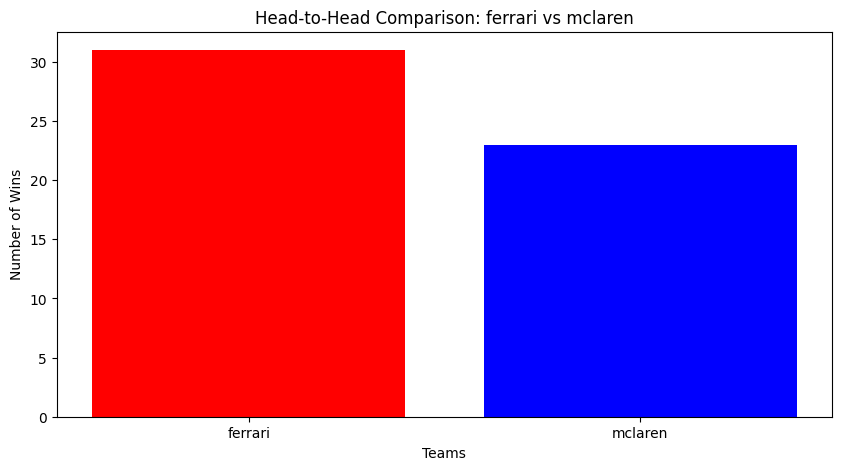

In [62]:
compare_teams_with_circuit_filter('ferrari', 'mclaren', analysis_df, circuit_name='autodromo nazionale di monza')

QUESTION 8

In [64]:
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

In [65]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,status,fastestlaptime_ms
0,1,18,1,1,22,1,1,1,10.0,58,5690616,39,2,218.300,Finished,87452
1,2,18,2,2,3,5,2,2,8.0,58,5696094,41,3,217.586,Finished,87739
2,3,18,3,3,7,7,3,3,6.0,58,5698779,41,5,216.719,Finished,88090
3,4,18,4,4,5,11,4,4,5.0,58,5707797,58,7,215.464,Finished,88603
4,5,18,5,1,23,3,5,5,4.0,58,5708630,43,1,218.385,Finished,87418


In [66]:
df = results_df[['driverId','raceId','positionOrder']].merge(drivers_df[['driverId','forename']],on = 'driverId')
df.head()

,driverId,raceId,positionOrder,forename
0,1,18,1,lewis
1,2,18,2,nick
2,3,18,3,nico
3,4,18,4,fernando
4,5,18,5,heikki


In [91]:
driver_stats = df.groupby('driverId').agg(
    avg_position=('positionOrder', 'mean'),
    std_dev_position=('positionOrder', 'std'),
    total_races=('positionOrder', 'count')
).reset_index()

driver_stats = driver_stats.merge(drivers_df[['driverId', 'forename','surname']], on='driverId')

driver_stats = driver_stats[driver_stats['total_races'] >= 100]

driver_stats = driver_stats.sort_values(by=['std_dev_position', 'avg_position'])

print("Most Consistent Drivers (Low Variance in Position):")
print(driver_stats[['forename', 'surname','avg_position', 'std_dev_position', 'total_races']].head(10))

print("\nLeast Consistent Drivers (High Variance in Position):")
print(driver_stats[['forename','surname', 'avg_position', 'std_dev_position', 'total_races']].tail(10))


Most Consistent Drivers (Low Variance in Position):
      forename     surname  avg_position  std_dev_position  total_races
823      kevin   magnussen     13.569892          4.082654          186
838      lance      stroll     12.369048          4.350731          168
824     daniil       kvyat     12.223214          4.592806          112
846  alexander       albon     11.914286          4.595387          105
840     pierre       gasly     11.259740          4.691538          154
837    esteban        ocon     11.224359          4.732283          156
15      adrian       sutil     14.523438          4.748750          128
49         jos  verstappen     14.242991          4.854178          107
844      lando      norris      7.851562          4.975673          128
806       nico  hülkenberg     11.926087          5.026456          230

Least Consistent Drivers (High Variance in Position):
    forename    surname  avg_position  std_dev_position  total_races
76   gerhard     berger     10.9

Here , Kevin is the most consistent since he has the lowest standard deviation . Gerhard is the least consistent since he has the highest standard deviation.

QUESTION 9 

In [76]:
lap_times_df = pd.read_csv('lap_times.csv')

In [77]:
import pandas as pd

# Merge lap times with results to get constructor info
lap_efficiency = lap_times_df.merge(results_df[['raceId', 'driverId', 'constructorId']], on=['raceId', 'driverId'])

# Merge with races to get circuit information
lap_efficiency = lap_efficiency.merge(races_df[['raceId', 'circuitId']], on='raceId')

# Aggregate: Compute average lap time and total laps per constructor per circuit
lap_efficiency = lap_efficiency.groupby(['circuitId', 'constructorId']).agg(
    avg_lap_time=('milliseconds', 'mean'),
    total_laps=('milliseconds', 'count')  # Using count of milliseconds as total laps
).reset_index()

# Merge with circuit names and constructor names
lap_efficiency = lap_efficiency.merge(circuits_df[['circuitId', 'name']], on='circuitId')
lap_efficiency = lap_efficiency.merge(constructors_df[['constructorId', 'name']], on='constructorId', suffixes=('_circuit', '_constructor'))

# Sort results by circuit and lap time efficiency (ascending order = better efficiency)
lap_efficiency = lap_efficiency.sort_values(by=['circuitId', 'avg_lap_time'])

print("Lap Time Efficiency Across Circuits:")
print(lap_efficiency[['name_circuit', 'name_constructor', 'avg_lap_time', 'total_laps']])


Lap Time Efficiency Across Circuits:
                        name_circuit name_constructor   avg_lap_time  \
40    albert park grand prix circuit       rb f1 team   84876.478261   
37    albert park grand prix circuit     racing point   90440.789474   
11    albert park grand prix circuit           spyker   93105.318182   
6     albert park grand prix circuit           toyota   95111.016467   
10    albert park grand prix circuit            honda   96319.961404   
...                              ...              ...            ...   
1034  las vegas strip street circuit     haas f1 team  103992.066667   
1027  las vegas strip street circuit         williams  104708.685714   
1036  las vegas strip street circuit   alpine f1 team  104966.554878   
1031  las vegas strip street circuit       alfa romeo  108320.900000   
1035  las vegas strip street circuit       alphatauri  108497.343750   

      total_laps  
40           115  
37           114  
11            66  
6            668  
10 

Rb F1 Team has the lowest average lap time of 84876.47 ms in the Albert Park Grand Prix Circuit.

In [79]:
# Compute overall efficiency: Average lap time per constructor
constructor_efficiency = lap_efficiency.groupby('name_constructor').agg(
    overall_avg_lap_time=('avg_lap_time', 'mean')
).reset_index()

# Find the most efficient team (lowest average lap time)
most_efficient_team = constructor_efficiency.nsmallest(1, 'overall_avg_lap_time')

# Display results
print("Most Efficient Team (Lowest Average Lap Time):")
print(most_efficient_team)


Most Efficient Team (Lowest Average Lap Time):
   name_constructor  overall_avg_lap_time
17           jaguar          91077.795318


C:\Users\Ritanya\AppData\Local\Temp\ipykernel_40000\1681603627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


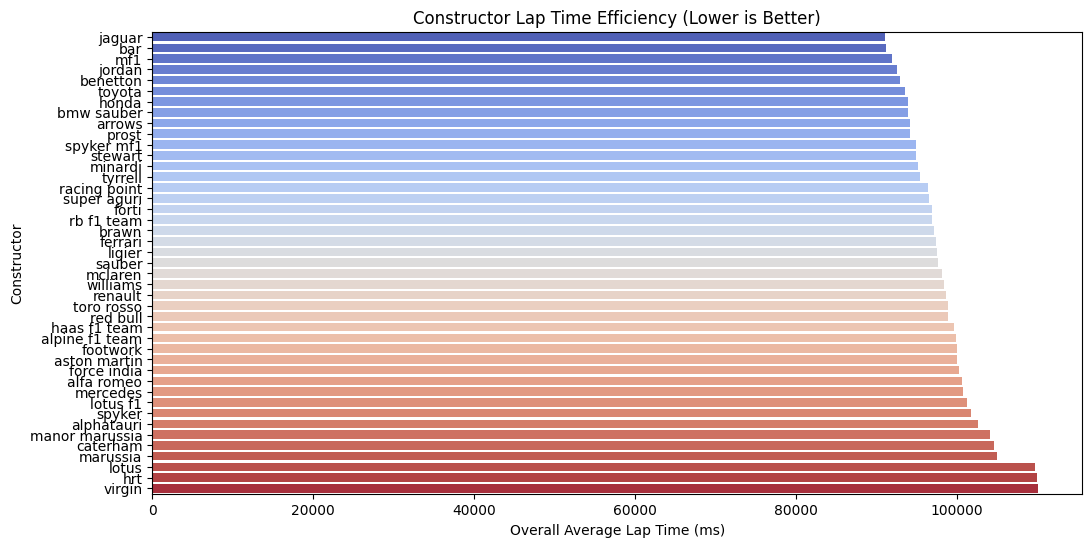

In [80]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=constructor_efficiency.sort_values(by='overall_avg_lap_time'),
    x='overall_avg_lap_time',
    y='name_constructor',
    palette='coolwarm'
)

plt.xlabel("Overall Average Lap Time (ms)")
plt.ylabel("Constructor")
plt.title("Constructor Lap Time Efficiency (Lower is Better)")
plt.show()


QUESTION 10

In [83]:
driver_standings_df = pd.read_csv('driver_standings.csv')
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0
2,3,18,3,6.0,3,0
3,4,18,4,5.0,4,0
4,5,18,5,4.0,5,0


In [84]:
print(driver_standings_df.columns)


Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'wins'],
      dtype='object')


In [90]:
import pandas as pd

# Rename conflicting columns in driver_standings_df
driver_standings_df = driver_standings_df.rename(columns={'points': 'standings_points', 'wins': 'standings_wins'})

# Strip column names to avoid leading/trailing spaces
driver_standings_df.columns = driver_standings_df.columns.str.strip()

# Ensure correct data types before merging
driver_standings_df = driver_standings_df.astype({'raceId': 'int', 'driverId': 'int'})
results_df = results_df.astype({'raceId': 'int', 'driverId': 'int'})

# Fill missing values in standings points & wins
driver_standings_df[['standings_points', 'standings_wins']] = driver_standings_df[['standings_points', 'standings_wins']].fillna(0)

# Merge race results with driver standings to get performance trends
driver_performance = results_df.merge(
    driver_standings_df[['raceId', 'driverId', 'standings_points', 'standings_wins']], 
    on=['raceId', 'driverId'], how='left'
)

# Fill missing values after merging
driver_performance[['standings_points', 'standings_wins']] = driver_performance[['standings_points', 'standings_wins']].fillna(0)

# Aggregate driver performance statistics
driver_performance = driver_performance.groupby('driverId').agg(
    avg_position=('positionOrder', 'mean'),   # Lower is better
    std_dev_position=('positionOrder', 'std'),  # Lower is better (consistent performance)
    total_points=('standings_points', 'sum'),  # Higher is better
    total_wins=('standings_wins', 'sum'),  # Higher is better
    races_participated=('raceId', 'count')  # Experience level
).reset_index()

# Merge with driver names for better visualization
driver_performance = driver_performance.merge(drivers_df[['driverId', 'forename', 'surname']], on='driverId')

# Sort the best-performing drivers
driver_performance = driver_performance.sort_values(
    by=['total_points', 'avg_position', 'total_wins'], 
    ascending=[False, True, False]  # More points → Better, Lower position avg → Better, More wins → Better
)

# Select the top two drivers for the best team lineup
best_team_lineup = driver_performance.head(2)

# Display results
print("🏆 Best Team Lineup Based on Performance Trends:")
print(best_team_lineup[['forename', 'surname', 'total_points', 'avg_position', 'total_wins']])


🏆 Best Team Lineup Based on Performance Trends:
    forename     surname  total_points  avg_position  total_wins
0      lewis    hamilton       50821.5      5.019663      1032.0
828      max  verstappen       32849.5      5.645933       709.0


In [ ]:
import pandas as pd

# Rename conflicting columns in driver_standings_df
driver_standings_df = driver_standings_df.rename(columns={'points': 'standings_points', 'wins': 'standings_wins'})

# Strip column names to avoid leading/trailing spaces
driver_standings_df.columns = driver_standings_df.columns.str.strip()

# Ensure correct data types before merging
driver_standings_df = driver_standings_df.astype({'raceId': 'int', 'driverId': 'int'})
results_df = results_df.astype({'raceId': 'int', 'driverId': 'int'})

# Fill missing values in standings points & wins
driver_standings_df[['standings_points', 'standings_wins']] = driver_standings_df[['standings_points', 'standings_wins']].fillna(0)

# Merge race results with driver standings to get performance trends
driver_performance = results_df.merge(
    driver_standings_df[['raceId', 'driverId', 'standings_points', 'standings_wins']], 
    on=['raceId', 'driverId'], how='left'
)

# Fill missing values after merging
driver_performance[['standings_points', 'standings_wins']] = driver_performance[['standings_points', 'standings_wins']].fillna(0)

# Aggregate driver performance statistics
driver_performance = driver_performance.groupby('driverId').agg(
    avg_position=('positionOrder', 'mean'),   # Lower is better
    std_dev_position=('positionOrder', 'std'),  # Lower is better (consistent performance)
    total_points=('standings_points', 'sum'),  # Higher is better
    total_wins=('standings_wins', 'sum'),  # Higher is better
    races_participated=('raceId', 'count')  # Experience level
).reset_index()

# Merge with driver names for better visualization
driver_performance = driver_performance.merge(drivers_df[['driverId', 'forename', 'surname']], on='driverId')

# Sort the best-performing drivers
driver_performance = driver_performance.sort_values(
    by=['total_points', 'avg_position', 'total_wins'], 
    ascending=[False, True, False]  # More points → Better, Lower position avg → Better, More wins → Better
)

# Select the top two drivers for the best team lineup
best_team_lineup = driver_performance.head(2)

# Display results
print("🏆 Best Team Lineup Based on Performance Trends:")
print(best_team_lineup[['forename', 'surname', 'total_points', 'avg_position', 'total_wins']])


🏆 Best Team Lineup Based on Performance Trends:
    forename     surname  total_points  avg_position  total_wins
0      lewis    hamilton       50821.5      5.019663      1032.0
828      max  verstappen       32849.5      5.645933       709.0
